In [17]:
from pathlib import Path
import os
import sys
import tifffile
import fastplotlib as fpl
import masknmf
import time
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
fpath = Path(r"D:\W2_DATA\kbarber\2025_03_01\mk301\assembled\plane_07_mk301.tiff")
data = tifffile.memmap(fpath)

max_rigid_shifts = [3, 3]
template = None
rigid_strategy = masknmf.RigidMotionCorrection(max_rigid_shifts, template = template)

rigid_strategy = masknmf.compute_template(data,
                                          rigid_strategy, 
                                          device = "cpu")

100%|██████████████████████████████████████████████████████████| 10/10 [00:08<00:00,  1.23it/s]


In [29]:
# save_path = Path("../../data").resolve()
# save_path.mkdir(exist_ok=True)
# save_name = save_path.joinpath("plane_07_reg2.tiff")
moco_results = masknmf.RegistrationArray(data,
                                         rigid_strategy,
                                         device = "cpu")
moco_results.shape

(64594, 448, 448)

In [30]:
pmd_obj = masknmf.compression.pmd_batch(moco_results,
                                        [64, 64], #This specifies how we partition the full FOV 
                                        [10, 10], #This specifies by how many pixels the partitions overlap
                                        [32, 32], #This is the generic PMD compression parameter (block size for the actual compression)
                                        moco_results.shape[0], #Number of frames we use to compress each block
                                        max_components = 10,
                                        background_rank = 10,
                                        device = "cuda"
                                       )

[25-04-30 13:03:14]: Processing 0:64 to 0:64
[25-04-30 13:09:53]: Starting compression
[25-04-30 13:09:53]: sampled from the following regions: [0]
[25-04-30 13:09:53]: We are initializing on a total of 64594 frames
[25-04-30 13:09:54]: Approximating full FOV basis terms
[25-04-30 13:09:54]: Loading data to estimate complete spatial basis
[25-04-30 13:09:55]: Finding spatiotemporal roughness thresholds


100%|████████████████████████████████████████████████████████| 250/250 [00:04<00:00, 60.98it/s]

[25-04-30 13:09:59]: Running Blockwise Decompositions


[25-04-30 13:10:00]: Constructed U matrix. Rank of U is 35
[25-04-30 13:10:01]: PMD Objected constructed
[25-04-30 13:10:01]: Processing 0:64 to 54:118
[25-04-30 13:17:00]: Starting compression
[25-04-30 13:17:00]: sampled from the following regions: [0]
[25-04-30 13:17:00]: We are initializing on a total of 64594 frames
[25-04-30 13:17:01]: Approximating full FOV basis terms
[25-04-30 13:17:01]: Loading data to estimate complete spatial basis
[25-04-30 13:17:02]: Finding spatiotemporal roughness thresholds


100%|████████████████████████████████████████████████████████| 250/250 [00:03<00:00, 64.52it/s]

[25-04-30 13:17:06]: Running Blockwise Decompositions


[25-04-30 13:17:07]: Constructed U matrix. Rank of U is 52
[25-04-30 13:17:07]: PMD Objected constructed
[25-04-30 13:17:07]: Processing 0:64 to 108:172
[25-04-30 13:24:04]: Starting compression
[25-04-30 13:24:04]: sampled from the following regions: [0]
[25-04-30 13:24:04]: We are initializing on a total of 64594 frames
[25-04-30 13:24:05]: Approximating full FOV basis terms
[25-04-30 13:24:05]: Loading data to estimate complete spatial basis
[25-04-30 13:24:06]: Finding spatiotemporal roughness thresholds


100%|████████████████████████████████████████████████████████| 250/250 [00:03<00:00, 64.83it/s]

[25-04-30 13:24:10]: Running Blockwise Decompositions


[25-04-30 13:24:11]: Constructed U matrix. Rank of U is 73
[25-04-30 13:24:11]: PMD Objected constructed
[25-04-30 13:24:11]: Processing 0:64 to 162:226
[25-04-30 13:32:17]: Starting compression
[25-04-30 13:32:17]: sampled from the following regions: [0]
[25-04-30 13:32:17]: We are initializing on a total of 64594 frames
[25-04-30 13:32:18]: Approximating full FOV basis terms
[25-04-30 13:32:18]: Loading data to estimate complete spatial basis
[25-04-30 13:32:19]: Finding spatiotemporal roughness thresholds


100%|████████████████████████████████████████████████████████| 250/250 [00:03<00:00, 63.88it/s]

[25-04-30 13:32:23]: Running Blockwise Decompositions


[25-04-30 13:32:24]: Constructed U matrix. Rank of U is 65
[25-04-30 13:32:24]: PMD Objected constructed
[25-04-30 13:32:24]: Processing 0:64 to 216:280
[25-04-30 13:41:22]: Starting compression
[25-04-30 13:41:22]: sampled from the following regions: [0]
[25-04-30 13:41:22]: We are initializing on a total of 64594 frames
[25-04-30 13:41:22]: Approximating full FOV basis terms
[25-04-30 13:41:23]: Loading data to estimate complete spatial basis
[25-04-30 13:41:23]: Finding spatiotemporal roughness thresholds


100%|████████████████████████████████████████████████████████| 250/250 [00:03<00:00, 64.85it/s]

[25-04-30 13:41:27]: Running Blockwise Decompositions


[25-04-30 13:41:28]: Constructed U matrix. Rank of U is 68
[25-04-30 13:41:28]: PMD Objected constructed
[25-04-30 13:41:28]: Processing 0:64 to 270:334
[25-04-30 13:49:11]: Starting compression
[25-04-30 13:49:11]: sampled from the following regions: [0]
[25-04-30 13:49:11]: We are initializing on a total of 64594 frames
[25-04-30 13:49:12]: Approximating full FOV basis terms
[25-04-30 13:49:12]: Loading data to estimate complete spatial basis
[25-04-30 13:49:12]: Finding spatiotemporal roughness thresholds


100%|████████████████████████████████████████████████████████| 250/250 [00:03<00:00, 65.39it/s]

[25-04-30 13:49:16]: Running Blockwise Decompositions


[25-04-30 13:49:17]: Constructed U matrix. Rank of U is 63
[25-04-30 13:49:17]: PMD Objected constructed
[25-04-30 13:49:17]: Processing 0:64 to 324:388
[25-04-30 13:56:52]: Starting compression
[25-04-30 13:56:52]: sampled from the following regions: [0]
[25-04-30 13:56:52]: We are initializing on a total of 64594 frames
[25-04-30 13:56:52]: Approximating full FOV basis terms
[25-04-30 13:56:52]: Loading data to estimate complete spatial basis
[25-04-30 13:56:53]: Finding spatiotemporal roughness thresholds


100%|████████████████████████████████████████████████████████| 250/250 [00:03<00:00, 63.46it/s]


[25-04-30 13:56:57]: Running Blockwise Decompositions
[25-04-30 13:56:58]: Constructed U matrix. Rank of U is 70
[25-04-30 13:56:58]: PMD Objected constructed
[25-04-30 13:56:58]: Processing 0:64 to 378:442
[25-04-30 14:04:15]: Starting compression
[25-04-30 14:04:15]: sampled from the following regions: [0]
[25-04-30 14:04:15]: We are initializing on a total of 64594 frames
[25-04-30 14:04:16]: Approximating full FOV basis terms
[25-04-30 14:04:16]: Loading data to estimate complete spatial basis
[25-04-30 14:04:17]: Finding spatiotemporal roughness thresholds


100%|████████████████████████████████████████████████████████| 250/250 [00:03<00:00, 65.45it/s]


[25-04-30 14:04:21]: Running Blockwise Decompositions
[25-04-30 14:04:22]: Constructed U matrix. Rank of U is 80
[25-04-30 14:04:22]: PMD Objected constructed
[25-04-30 14:04:22]: Processing 0:64 to 410:448
[25-04-30 14:11:15]: Starting compression
[25-04-30 14:11:15]: sampled from the following regions: [0]
[25-04-30 14:11:15]: We are initializing on a total of 64594 frames
[25-04-30 14:11:16]: Approximating full FOV basis terms
[25-04-30 14:11:16]: Loading data to estimate complete spatial basis
[25-04-30 14:11:16]: Finding spatiotemporal roughness thresholds


100%|████████████████████████████████████████████████████████| 250/250 [00:03<00:00, 65.25it/s]

[25-04-30 14:11:20]: Running Blockwise Decompositions


[25-04-30 14:11:21]: Constructed U matrix. Rank of U is 55
[25-04-30 14:11:21]: PMD Objected constructed
[25-04-30 14:11:21]: Processing 54:118 to 0:64
[25-04-30 14:20:01]: Starting compression
[25-04-30 14:20:01]: sampled from the following regions: [0]
[25-04-30 14:20:01]: We are initializing on a total of 64594 frames
[25-04-30 14:20:02]: Approximating full FOV basis terms
[25-04-30 14:20:02]: Loading data to estimate complete spatial basis
[25-04-30 14:20:03]: Finding spatiotemporal roughness thresholds


100%|████████████████████████████████████████████████████████| 250/250 [00:03<00:00, 65.09it/s]

[25-04-30 14:20:07]: Running Blockwise Decompositions


[25-04-30 14:20:08]: Constructed U matrix. Rank of U is 45
[25-04-30 14:20:08]: PMD Objected constructed
[25-04-30 14:20:08]: Processing 54:118 to 54:118
[25-04-30 14:28:22]: Starting compression
[25-04-30 14:28:22]: sampled from the following regions: [0]
[25-04-30 14:28:22]: We are initializing on a total of 64594 frames
[25-04-30 14:28:23]: Approximating full FOV basis terms
[25-04-30 14:28:23]: Loading data to estimate complete spatial basis
[25-04-30 14:28:24]: Finding spatiotemporal roughness thresholds


100%|████████████████████████████████████████████████████████| 250/250 [00:03<00:00, 66.20it/s]

[25-04-30 14:28:28]: Running Blockwise Decompositions


[25-04-30 14:28:29]: Constructed U matrix. Rank of U is 56
[25-04-30 14:28:29]: PMD Objected constructed
[25-04-30 14:28:29]: Processing 54:118 to 108:172
[25-04-30 14:36:02]: Starting compression
[25-04-30 14:36:02]: sampled from the following regions: [0]
[25-04-30 14:36:02]: We are initializing on a total of 64594 frames
[25-04-30 14:36:03]: Approximating full FOV basis terms
[25-04-30 14:36:03]: Loading data to estimate complete spatial basis
[25-04-30 14:36:04]: Finding spatiotemporal roughness thresholds


100%|████████████████████████████████████████████████████████| 250/250 [00:03<00:00, 66.81it/s]

[25-04-30 14:36:07]: Running Blockwise Decompositions


[25-04-30 14:36:08]: Constructed U matrix. Rank of U is 59
[25-04-30 14:36:08]: PMD Objected constructed
[25-04-30 14:36:08]: Processing 54:118 to 162:226
[25-04-30 14:43:48]: Starting compression
[25-04-30 14:43:48]: sampled from the following regions: [0]
[25-04-30 14:43:48]: We are initializing on a total of 64594 frames
[25-04-30 14:43:49]: Approximating full FOV basis terms
[25-04-30 14:43:49]: Loading data to estimate complete spatial basis
[25-04-30 14:43:49]: Finding spatiotemporal roughness thresholds


100%|████████████████████████████████████████████████████████| 250/250 [00:03<00:00, 65.72it/s]

[25-04-30 14:43:53]: Running Blockwise Decompositions


[25-04-30 14:43:54]: Constructed U matrix. Rank of U is 86
[25-04-30 14:43:55]: PMD Objected constructed
[25-04-30 14:43:55]: Processing 54:118 to 216:280
[25-04-30 14:50:46]: Starting compression
[25-04-30 14:50:46]: sampled from the following regions: [0]
[25-04-30 14:50:46]: We are initializing on a total of 64594 frames
[25-04-30 14:50:47]: Approximating full FOV basis terms
[25-04-30 14:50:48]: Loading data to estimate complete spatial basis
[25-04-30 14:50:53]: Finding spatiotemporal roughness thresholds


100%|████████████████████████████████████████████████████████| 250/250 [00:03<00:00, 66.63it/s]

[25-04-30 14:50:57]: Running Blockwise Decompositions


[25-04-30 14:50:58]: Constructed U matrix. Rank of U is 72
[25-04-30 14:50:58]: PMD Objected constructed
[25-04-30 14:50:58]: Processing 54:118 to 270:334
[25-04-30 14:56:43]: Starting compression
[25-04-30 14:56:43]: sampled from the following regions: [0]
[25-04-30 14:56:43]: We are initializing on a total of 64594 frames
[25-04-30 14:56:43]: Approximating full FOV basis terms
[25-04-30 14:56:43]: Loading data to estimate complete spatial basis
[25-04-30 14:56:44]: Finding spatiotemporal roughness thresholds


100%|████████████████████████████████████████████████████████| 250/250 [00:03<00:00, 65.38it/s]

[25-04-30 14:56:48]: Running Blockwise Decompositions


[25-04-30 14:56:49]: Constructed U matrix. Rank of U is 56
[25-04-30 14:56:49]: PMD Objected constructed
[25-04-30 14:56:49]: Processing 54:118 to 324:388
[25-04-30 15:04:16]: Starting compression
[25-04-30 15:04:16]: sampled from the following regions: [0]
[25-04-30 15:04:16]: We are initializing on a total of 64594 frames
[25-04-30 15:04:16]: Approximating full FOV basis terms
[25-04-30 15:04:17]: Loading data to estimate complete spatial basis
[25-04-30 15:04:17]: Finding spatiotemporal roughness thresholds


100%|████████████████████████████████████████████████████████| 250/250 [00:03<00:00, 66.62it/s]

[25-04-30 15:04:21]: Running Blockwise Decompositions


[25-04-30 15:04:22]: Constructed U matrix. Rank of U is 54
[25-04-30 15:04:22]: PMD Objected constructed
[25-04-30 15:04:22]: Processing 54:118 to 378:442
[25-04-30 15:11:26]: Starting compression
[25-04-30 15:11:26]: sampled from the following regions: [0]
[25-04-30 15:11:26]: We are initializing on a total of 64594 frames
[25-04-30 15:11:27]: Approximating full FOV basis terms
[25-04-30 15:11:27]: Loading data to estimate complete spatial basis
[25-04-30 15:11:27]: Finding spatiotemporal roughness thresholds


100%|████████████████████████████████████████████████████████| 250/250 [00:03<00:00, 66.60it/s]

[25-04-30 15:11:31]: Running Blockwise Decompositions


[25-04-30 15:11:32]: Constructed U matrix. Rank of U is 52
[25-04-30 15:11:32]: PMD Objected constructed
[25-04-30 15:11:32]: Processing 54:118 to 410:448
[25-04-30 15:18:26]: Starting compression
[25-04-30 15:18:26]: sampled from the following regions: [0]
[25-04-30 15:18:26]: We are initializing on a total of 64594 frames
[25-04-30 15:18:27]: Approximating full FOV basis terms
[25-04-30 15:18:27]: Loading data to estimate complete spatial basis
[25-04-30 15:18:27]: Finding spatiotemporal roughness thresholds


100%|████████████████████████████████████████████████████████| 250/250 [00:03<00:00, 66.66it/s]

[25-04-30 15:18:31]: Running Blockwise Decompositions


[25-04-30 15:18:32]: Constructed U matrix. Rank of U is 36
[25-04-30 15:18:32]: PMD Objected constructed
[25-04-30 15:18:32]: Processing 108:172 to 0:64
[25-04-30 15:28:29]: Starting compression
[25-04-30 15:28:29]: sampled from the following regions: [0]
[25-04-30 15:28:29]: We are initializing on a total of 64594 frames
[25-04-30 15:28:30]: Approximating full FOV basis terms
[25-04-30 15:28:30]: Loading data to estimate complete spatial basis
[25-04-30 15:28:31]: Finding spatiotemporal roughness thresholds


100%|████████████████████████████████████████████████████████| 250/250 [00:03<00:00, 65.15it/s]

[25-04-30 15:28:35]: Running Blockwise Decompositions


[25-04-30 15:28:36]: Constructed U matrix. Rank of U is 58
[25-04-30 15:28:36]: PMD Objected constructed
[25-04-30 15:28:36]: Processing 108:172 to 54:118
[25-04-30 15:35:30]: Starting compression
[25-04-30 15:35:30]: sampled from the following regions: [0]
[25-04-30 15:35:30]: We are initializing on a total of 64594 frames
[25-04-30 15:35:31]: Approximating full FOV basis terms
[25-04-30 15:35:31]: Loading data to estimate complete spatial basis
[25-04-30 15:35:31]: Finding spatiotemporal roughness thresholds


100%|████████████████████████████████████████████████████████| 250/250 [00:03<00:00, 62.91it/s]

[25-04-30 15:35:36]: Running Blockwise Decompositions


[25-04-30 15:35:37]: Constructed U matrix. Rank of U is 81
[25-04-30 15:35:37]: PMD Objected constructed
[25-04-30 15:35:37]: Processing 108:172 to 108:172
[25-04-30 15:41:53]: Starting compression
[25-04-30 15:41:54]: sampled from the following regions: [0]
[25-04-30 15:41:54]: We are initializing on a total of 64594 frames
[25-04-30 15:41:54]: Approximating full FOV basis terms
[25-04-30 15:41:55]: Loading data to estimate complete spatial basis
[25-04-30 15:41:55]: Finding spatiotemporal roughness thresholds


100%|████████████████████████████████████████████████████████| 250/250 [00:03<00:00, 64.22it/s]

[25-04-30 15:41:59]: Running Blockwise Decompositions


[25-04-30 15:42:00]: Constructed U matrix. Rank of U is 68
[25-04-30 15:42:00]: PMD Objected constructed
[25-04-30 15:42:00]: Processing 108:172 to 162:226
[25-04-30 15:48:16]: Starting compression
[25-04-30 15:48:16]: sampled from the following regions: [0]
[25-04-30 15:48:16]: We are initializing on a total of 64594 frames
[25-04-30 15:48:17]: Approximating full FOV basis terms
[25-04-30 15:48:17]: Loading data to estimate complete spatial basis
[25-04-30 15:48:17]: Finding spatiotemporal roughness thresholds


100%|████████████████████████████████████████████████████████| 250/250 [00:03<00:00, 66.59it/s]

[25-04-30 15:48:21]: Running Blockwise Decompositions


[25-04-30 15:48:22]: Constructed U matrix. Rank of U is 55
[25-04-30 15:48:22]: PMD Objected constructed
[25-04-30 15:48:22]: Processing 108:172 to 216:280
[25-04-30 15:54:59]: Starting compression
[25-04-30 15:55:00]: sampled from the following regions: [0]
[25-04-30 15:55:00]: We are initializing on a total of 64594 frames
[25-04-30 15:55:00]: Approximating full FOV basis terms
[25-04-30 15:55:00]: Loading data to estimate complete spatial basis
[25-04-30 15:55:01]: Finding spatiotemporal roughness thresholds


100%|████████████████████████████████████████████████████████| 250/250 [00:03<00:00, 65.74it/s]

[25-04-30 15:55:05]: Running Blockwise Decompositions


[25-04-30 15:55:06]: Constructed U matrix. Rank of U is 66
[25-04-30 15:55:06]: PMD Objected constructed
[25-04-30 15:55:06]: Processing 108:172 to 270:334
[25-04-30 16:01:43]: Starting compression
[25-04-30 16:01:43]: sampled from the following regions: [0]
[25-04-30 16:01:43]: We are initializing on a total of 64594 frames
[25-04-30 16:01:44]: Approximating full FOV basis terms
[25-04-30 16:01:44]: Loading data to estimate complete spatial basis
[25-04-30 16:01:44]: Finding spatiotemporal roughness thresholds


100%|████████████████████████████████████████████████████████| 250/250 [00:03<00:00, 66.03it/s]

[25-04-30 16:01:48]: Running Blockwise Decompositions


[25-04-30 16:01:49]: Constructed U matrix. Rank of U is 49
[25-04-30 16:01:49]: PMD Objected constructed
[25-04-30 16:01:49]: Processing 108:172 to 324:388
[25-04-30 16:09:19]: Starting compression
[25-04-30 16:09:19]: sampled from the following regions: [0]
[25-04-30 16:09:19]: We are initializing on a total of 64594 frames
[25-04-30 16:09:20]: Approximating full FOV basis terms
[25-04-30 16:09:20]: Loading data to estimate complete spatial basis
[25-04-30 16:09:21]: Finding spatiotemporal roughness thresholds


100%|████████████████████████████████████████████████████████| 250/250 [00:03<00:00, 65.74it/s]

[25-04-30 16:09:24]: Running Blockwise Decompositions


[25-04-30 16:09:25]: Constructed U matrix. Rank of U is 63
[25-04-30 16:09:25]: PMD Objected constructed
[25-04-30 16:09:26]: Processing 108:172 to 378:442
[25-04-30 16:16:39]: Starting compression
[25-04-30 16:16:39]: sampled from the following regions: [0]
[25-04-30 16:16:40]: We are initializing on a total of 64594 frames
[25-04-30 16:16:40]: Approximating full FOV basis terms
[25-04-30 16:16:40]: Loading data to estimate complete spatial basis
[25-04-30 16:16:41]: Finding spatiotemporal roughness thresholds


100%|████████████████████████████████████████████████████████| 250/250 [00:03<00:00, 66.14it/s]

[25-04-30 16:16:45]: Running Blockwise Decompositions


[25-04-30 16:16:46]: Constructed U matrix. Rank of U is 51
[25-04-30 16:16:46]: PMD Objected constructed
[25-04-30 16:16:46]: Processing 108:172 to 410:448
[25-04-30 16:24:47]: Starting compression
[25-04-30 16:24:47]: sampled from the following regions: [0]
[25-04-30 16:24:47]: We are initializing on a total of 64594 frames
[25-04-30 16:24:48]: Approximating full FOV basis terms
[25-04-30 16:24:48]: Loading data to estimate complete spatial basis
[25-04-30 16:24:49]: Finding spatiotemporal roughness thresholds


100%|████████████████████████████████████████████████████████| 250/250 [00:04<00:00, 62.42it/s]

[25-04-30 16:24:53]: Running Blockwise Decompositions


[25-04-30 16:24:53]: Constructed U matrix. Rank of U is 32
[25-04-30 16:24:54]: PMD Objected constructed
[25-04-30 16:24:54]: Processing 162:226 to 0:64
[25-04-30 16:33:16]: Starting compression
[25-04-30 16:33:16]: sampled from the following regions: [0]
[25-04-30 16:33:16]: We are initializing on a total of 64594 frames
[25-04-30 16:33:17]: Approximating full FOV basis terms
[25-04-30 16:33:17]: Loading data to estimate complete spatial basis
[25-04-30 16:33:18]: Finding spatiotemporal roughness thresholds


100%|████████████████████████████████████████████████████████| 250/250 [00:03<00:00, 66.02it/s]

[25-04-30 16:33:21]: Running Blockwise Decompositions


[25-04-30 16:33:23]: Constructed U matrix. Rank of U is 57
[25-04-30 16:33:23]: PMD Objected constructed
[25-04-30 16:33:23]: Processing 162:226 to 54:118
[25-04-30 16:42:31]: Starting compression
[25-04-30 16:42:31]: sampled from the following regions: [0]
[25-04-30 16:42:32]: We are initializing on a total of 64594 frames
[25-04-30 16:42:32]: Approximating full FOV basis terms
[25-04-30 16:42:33]: Loading data to estimate complete spatial basis
[25-04-30 16:42:33]: Finding spatiotemporal roughness thresholds


100%|████████████████████████████████████████████████████████| 250/250 [00:03<00:00, 65.87it/s]

[25-04-30 16:42:37]: Running Blockwise Decompositions


[25-04-30 16:42:38]: Constructed U matrix. Rank of U is 63
[25-04-30 16:42:38]: PMD Objected constructed
[25-04-30 16:42:38]: Processing 162:226 to 108:172
[25-04-30 16:52:07]: Starting compression
[25-04-30 16:52:07]: sampled from the following regions: [0]
[25-04-30 16:52:07]: We are initializing on a total of 64594 frames
[25-04-30 16:52:08]: Approximating full FOV basis terms
[25-04-30 16:52:08]: Loading data to estimate complete spatial basis
[25-04-30 16:52:09]: Finding spatiotemporal roughness thresholds


100%|████████████████████████████████████████████████████████| 250/250 [00:03<00:00, 63.32it/s]

[25-04-30 16:52:13]: Running Blockwise Decompositions


[25-04-30 16:52:14]: Constructed U matrix. Rank of U is 63
[25-04-30 16:52:14]: PMD Objected constructed
[25-04-30 16:52:14]: Processing 162:226 to 162:226
[25-04-30 17:00:25]: Starting compression
[25-04-30 17:00:25]: sampled from the following regions: [0]
[25-04-30 17:00:25]: We are initializing on a total of 64594 frames
[25-04-30 17:00:26]: Approximating full FOV basis terms
[25-04-30 17:00:26]: Loading data to estimate complete spatial basis
[25-04-30 17:00:26]: Finding spatiotemporal roughness thresholds


100%|████████████████████████████████████████████████████████| 250/250 [00:03<00:00, 64.59it/s]


[25-04-30 17:00:30]: Running Blockwise Decompositions
[25-04-30 17:00:31]: Constructed U matrix. Rank of U is 70
[25-04-30 17:00:31]: PMD Objected constructed
[25-04-30 17:00:31]: Processing 162:226 to 216:280
[25-04-30 17:08:59]: Starting compression
[25-04-30 17:08:59]: sampled from the following regions: [0]
[25-04-30 17:08:59]: We are initializing on a total of 64594 frames
[25-04-30 17:09:00]: Approximating full FOV basis terms
[25-04-30 17:09:00]: Loading data to estimate complete spatial basis
[25-04-30 17:09:00]: Finding spatiotemporal roughness thresholds


100%|████████████████████████████████████████████████████████| 250/250 [00:03<00:00, 66.18it/s]

[25-04-30 17:09:04]: Running Blockwise Decompositions


[25-04-30 17:09:05]: Constructed U matrix. Rank of U is 49
[25-04-30 17:09:05]: PMD Objected constructed
[25-04-30 17:09:05]: Processing 162:226 to 270:334
[25-04-30 17:17:34]: Starting compression
[25-04-30 17:17:35]: sampled from the following regions: [0]
[25-04-30 17:17:35]: We are initializing on a total of 64594 frames
[25-04-30 17:17:35]: Approximating full FOV basis terms
[25-04-30 17:17:36]: Loading data to estimate complete spatial basis
[25-04-30 17:17:36]: Finding spatiotemporal roughness thresholds


100%|████████████████████████████████████████████████████████| 250/250 [00:03<00:00, 65.22it/s]


[25-04-30 17:17:40]: Running Blockwise Decompositions
[25-04-30 17:17:41]: Constructed U matrix. Rank of U is 44
[25-04-30 17:17:41]: PMD Objected constructed
[25-04-30 17:17:41]: Processing 162:226 to 324:388
[25-04-30 17:23:50]: Starting compression
[25-04-30 17:23:50]: sampled from the following regions: [0]
[25-04-30 17:23:50]: We are initializing on a total of 64594 frames
[25-04-30 17:23:51]: Approximating full FOV basis terms
[25-04-30 17:23:51]: Loading data to estimate complete spatial basis
[25-04-30 17:23:51]: Finding spatiotemporal roughness thresholds


100%|████████████████████████████████████████████████████████| 250/250 [00:03<00:00, 65.87it/s]

[25-04-30 17:23:55]: Running Blockwise Decompositions


[25-04-30 17:23:56]: Constructed U matrix. Rank of U is 44
[25-04-30 17:23:56]: PMD Objected constructed
[25-04-30 17:23:56]: Processing 162:226 to 378:442
[25-04-30 17:31:01]: Starting compression
[25-04-30 17:31:01]: sampled from the following regions: [0]
[25-04-30 17:31:01]: We are initializing on a total of 64594 frames
[25-04-30 17:31:02]: Approximating full FOV basis terms
[25-04-30 17:31:02]: Loading data to estimate complete spatial basis
[25-04-30 17:31:02]: Finding spatiotemporal roughness thresholds


100%|████████████████████████████████████████████████████████| 250/250 [00:03<00:00, 64.83it/s]


[25-04-30 17:31:06]: Running Blockwise Decompositions
[25-04-30 17:31:07]: Constructed U matrix. Rank of U is 50
[25-04-30 17:31:07]: PMD Objected constructed
[25-04-30 17:31:07]: Processing 162:226 to 410:448
[25-04-30 17:40:39]: Starting compression
[25-04-30 17:40:39]: sampled from the following regions: [0]
[25-04-30 17:40:39]: We are initializing on a total of 64594 frames
[25-04-30 17:40:40]: Approximating full FOV basis terms
[25-04-30 17:40:40]: Loading data to estimate complete spatial basis
[25-04-30 17:40:41]: Finding spatiotemporal roughness thresholds


100%|████████████████████████████████████████████████████████| 250/250 [00:03<00:00, 66.83it/s]

[25-04-30 17:40:44]: Running Blockwise Decompositions


[25-04-30 17:40:45]: Constructed U matrix. Rank of U is 35
[25-04-30 17:40:45]: PMD Objected constructed
[25-04-30 17:40:45]: Processing 216:280 to 0:64
[25-04-30 17:48:31]: Starting compression
[25-04-30 17:48:31]: sampled from the following regions: [0]
[25-04-30 17:48:31]: We are initializing on a total of 64594 frames
[25-04-30 17:48:32]: Approximating full FOV basis terms
[25-04-30 17:48:32]: Loading data to estimate complete spatial basis
[25-04-30 17:48:32]: Finding spatiotemporal roughness thresholds


100%|████████████████████████████████████████████████████████| 250/250 [00:03<00:00, 65.23it/s]

[25-04-30 17:48:36]: Running Blockwise Decompositions


[25-04-30 17:48:37]: Constructed U matrix. Rank of U is 50
[25-04-30 17:48:37]: PMD Objected constructed
[25-04-30 17:48:37]: Processing 216:280 to 54:118
[25-04-30 17:57:52]: Starting compression
[25-04-30 17:57:52]: sampled from the following regions: [0]
[25-04-30 17:57:52]: We are initializing on a total of 64594 frames
[25-04-30 17:57:53]: Approximating full FOV basis terms
[25-04-30 17:57:53]: Loading data to estimate complete spatial basis
[25-04-30 17:57:53]: Finding spatiotemporal roughness thresholds


100%|████████████████████████████████████████████████████████| 250/250 [00:03<00:00, 66.34it/s]

[25-04-30 17:57:57]: Running Blockwise Decompositions


[25-04-30 17:57:58]: Constructed U matrix. Rank of U is 65
[25-04-30 17:57:58]: PMD Objected constructed
[25-04-30 17:57:58]: Processing 216:280 to 108:172
[25-04-30 18:06:48]: Starting compression
[25-04-30 18:06:49]: sampled from the following regions: [0]
[25-04-30 18:06:49]: We are initializing on a total of 64594 frames
[25-04-30 18:06:49]: Approximating full FOV basis terms
[25-04-30 18:06:49]: Loading data to estimate complete spatial basis
[25-04-30 18:06:50]: Finding spatiotemporal roughness thresholds


100%|████████████████████████████████████████████████████████| 250/250 [00:03<00:00, 66.64it/s]

[25-04-30 18:06:54]: Running Blockwise Decompositions


[25-04-30 18:06:55]: Constructed U matrix. Rank of U is 54
[25-04-30 18:06:55]: PMD Objected constructed
[25-04-30 18:06:55]: Processing 216:280 to 162:226
[25-04-30 18:16:02]: Starting compression
[25-04-30 18:16:02]: sampled from the following regions: [0]
[25-04-30 18:16:02]: We are initializing on a total of 64594 frames
[25-04-30 18:16:03]: Approximating full FOV basis terms
[25-04-30 18:16:03]: Loading data to estimate complete spatial basis
[25-04-30 18:16:03]: Finding spatiotemporal roughness thresholds


100%|████████████████████████████████████████████████████████| 250/250 [00:03<00:00, 66.28it/s]

[25-04-30 18:16:07]: Running Blockwise Decompositions


[25-04-30 18:16:08]: Constructed U matrix. Rank of U is 68
[25-04-30 18:16:08]: PMD Objected constructed
[25-04-30 18:16:08]: Processing 216:280 to 216:280
[25-04-30 18:22:56]: Starting compression
[25-04-30 18:22:56]: sampled from the following regions: [0]
[25-04-30 18:22:56]: We are initializing on a total of 64594 frames
[25-04-30 18:22:57]: Approximating full FOV basis terms
[25-04-30 18:22:57]: Loading data to estimate complete spatial basis
[25-04-30 18:22:57]: Finding spatiotemporal roughness thresholds


100%|████████████████████████████████████████████████████████| 250/250 [00:03<00:00, 66.47it/s]

[25-04-30 18:23:01]: Running Blockwise Decompositions


[25-04-30 18:23:02]: Constructed U matrix. Rank of U is 53
[25-04-30 18:23:02]: PMD Objected constructed
[25-04-30 18:23:02]: Processing 216:280 to 270:334


RuntimeError: [enforce fail at alloc_cpu.cpp:116] data. DefaultCPUAllocator: not enough memory: you tried to allocate 51857096704 bytes.

In [19]:
pmd_obj.to('cuda')

RFBOutputContext()

C:\Users\RBO\repos\masknmf-toolbox\.venv\Lib\site-packages\fastplotlib\graphics\_features\_base.py:18: UserWarning: casting float64 array to float32
  warn(f"casting {array.dtype} array to float32")


JupyterRenderCanvas(css_height='300.0px', css_width='500.0px')
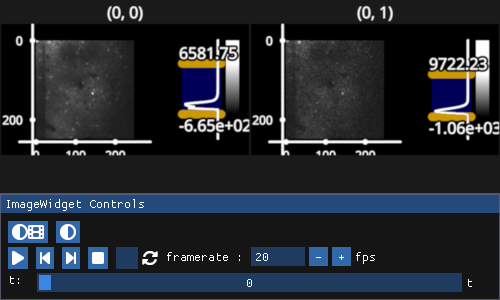

In [9]:
iw = fpl.ImageWidget(data = [pmd_obj[:200, 200:712, 200:712], data[:200, 200:712, 200:712]])
iw.cmap = "gray"
iw.show()

In [10]:
iw.close()

In [20]:
num_frames, fov_dim1, fov_dim2 = pmd_obj.shape
device = 'cuda'
pmd_demixer = masknmf.demixing.signal_demixer.SignalDemixer(
                                                pmd_obj,
                                                device=device,
                                                frame_batch_size=100)

find superpixels!
find pure superpixels!
prepare iteration!


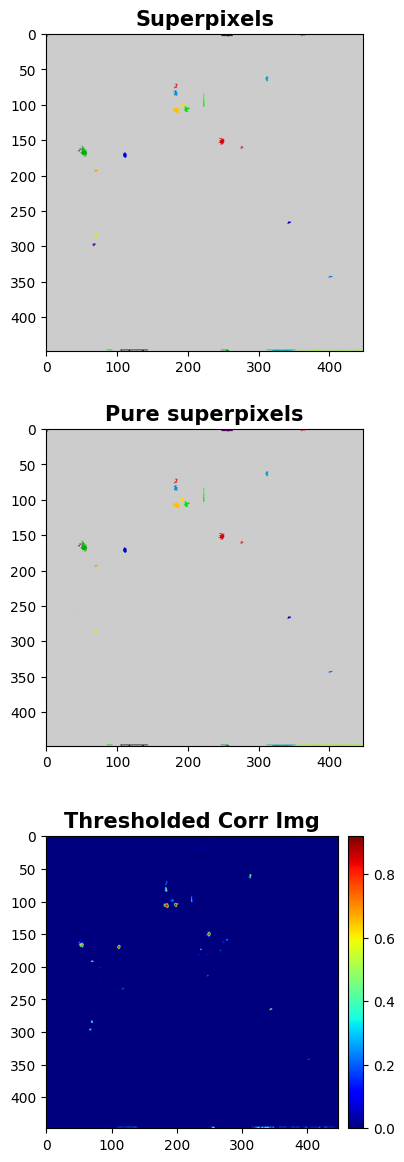

Identified 24 neurons here


In [24]:
init_kwargs = {
    #Worth modifying
    'mad_correlation_threshold':0.05,

    #Mostly stable
    'min_superpixel_size':5,
    'robust_corr_term':1,
    'mad_threshold':12,
    'residual_threshold': 0.3,
    'patch_size':(40, 40),
    'plot_en':True,
    'text':False,
}

pmd_demixer.initialize_signals(**init_kwargs, is_custom = False)
print(f"Identified {pmd_demixer.results[0].shape[1]} neurons here")

In [13]:
pmd_demixer.lock_results_and_continue()

Now in demixing state


In [14]:
## Demixing State

num_iters = 25
## Now run demixing...
localnmf_params = {
    'maxiter':num_iters,
    'support_threshold':np.linspace(0.999, 0.8, num_iters).tolist(),
    'deletion_threshold':0.2,
    'ring_model_start_pt': 4,
    'ring_radius':20,
    'merge_threshold':0.8,
    'merge_overlap_threshold':0.8,
    'update_frequency':4,
    'c_nonneg':True,
    'denoise':False,
    'plot_en': True
}

start_time = time.time()
with torch.no_grad():
    pmd_demixer.demix(**localnmf_params)
print(f"that took {time.time() - start_time}")
print(f"after this step {pmd_demixer.results.a.shape[1]} signals identified")



 16%|█████████▍                                                 | 4/25 [01:29<07:48, 22.29s/it]


KeyboardInterrupt: 

In [ ]:
# If desired, you can view the demixing results at this stage 
iw = masknmf.visualization.make_demixing_video(pmd_demixer.results,
                    device,
                    show_histogram = True,
                    v_range = [-100, 300])

iw.show()

In [29]:
# Move to next stage demixing
pmd_demixer.lock_results_and_continue(carry_background=True)

Now in the initialization state


In [4]:
init_kwargs = {
    #Worth modifying
    'mad_correlation_threshold':0.7,
    'min_superpixel_size':5,
    'robust_corr_term':1,

    #Mostly stable
    'mad_threshold':3,
    'residual_threshold': 0.3,
    'patch_size':(40, 40),
    'plot_en':True,
    'text':False,
}

pmd_demixer.initialize_signals(**init_kwargs, is_custom = False)
print(f"Identified {pmd_demixer.results[0].shape[1]} neurons here")

In [31]:
pmd_demixer.lock_results_and_continue(carry_background=True)

Now in demixing state


In [32]:
num_iters = 25
## Now run demixing...
localnmf_params = {
    'maxiter':num_iters,
    'support_threshold':np.linspace(0.999, 0.7, num_iters).tolist(),
    'deletion_threshold':0.2,
    'ring_model_start_pt': 4,
    'ring_radius':20,
    'merge_threshold':0.8,
    'merge_overlap_threshold':0.8,
    'update_frequency':4,
    'c_nonneg':True,
    'denoise':False,
    'plot_en': True
}

start_time = time.time()
with torch.no_grad():
    pmd_demixer.demix(**localnmf_params)
print(f"that took {time.time() - start_time}")
print(f"after this step {pmd_demixer.results.a.shape[1]} signals identified")



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:19<00:00,  1.27it/s]

that took 19.98130965232849
after this step 22 signals identified


RFBOutputContext()

JupyterRenderCanvas(css_height='300.0px', css_width='500.0px')
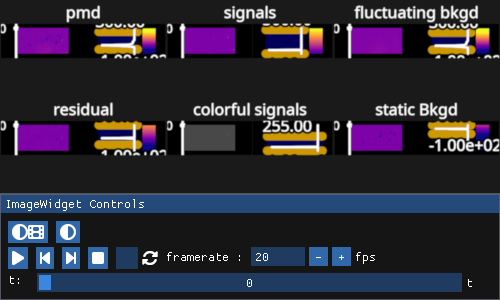

In [33]:
iw = masknmf.visualization.make_demixing_video(pmd_demixer.results,
                    device,
                    show_histogram = True,
                    v_range = [-100, 300])

iw.show()

In [34]:
## Specify which folder things get saved to: 
folder = 'neurons_darcy_apr29_t2'
if os.path.exists(folder):
    raise ValueError(f"folder {folder} already exists. delete it or pick different folder name")
else:
    os.mkdir(folder)

results = pmd_demixer.results

for i in range(results.a.shape[1]):
    name = f"neuron_{i}.html"
    masknmf.visualization.plot_ith_roi(i, results, folder=folder, name=name, radius = 30, residual_mode = masknmf.ResidCorrMode.RESIDUAL)

masknmf.visualization.construct_index(folder)

Index file "neurons_darcy_apr29_t2/index.html" created successfully.


In [ ]:
#NOTE: You can open "index.html" and "scroll" through the above results in the folder